In [1]:
import sys
sys.path.append("../")

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.preprocessing import MinMaxScaler
df_large = pd.read_csv("../data/df_large_prep.csv", index_col=0)
df_small = pd.read_csv("../data/df_small_prep.csv", index_col=0)
def plot_pred( x_data, y_data, x_fit, y_fit, a_fit, b_fit ,   target_name):
    plt.scatter(x_data, y_data, color='gray', label='Data')
    plt.plot(x_fit, y_fit, color='blue', label='Exponential Regression')
    plt.xlabel('NewCFactor')
    plt.ylabel(f'{target_name}')
    # plt.title(f'Exponential Regression of {self.data_type}')
    plt.legend()
    plt.show()


    print(f"Fitted a: {a_fit}")
    print(f"Fitted b: {b_fit}")
def exponential_func( x, a, b):
    return a * np.exp(b * x)

def fit( x_data, y_data): 
    x_data = x_data.reshape(-1,) 
    y_data = y_data.reshape(-1,) 
    params, _ = curve_fit(exponential_func, x_data, y_data, maxfev=50000)
    a_fit, b_fit = params
    x_fit = np.linspace(min(x_data), max(x_data), len(x_data))
    y_fit = exponential_func(x_fit, a_fit, b_fit)
    return x_data, y_data, x_fit, y_fit, a_fit, b_fit

def predict(value, a_fit , b_fit):
    return exponential_func(value , a_fit , b_fit)

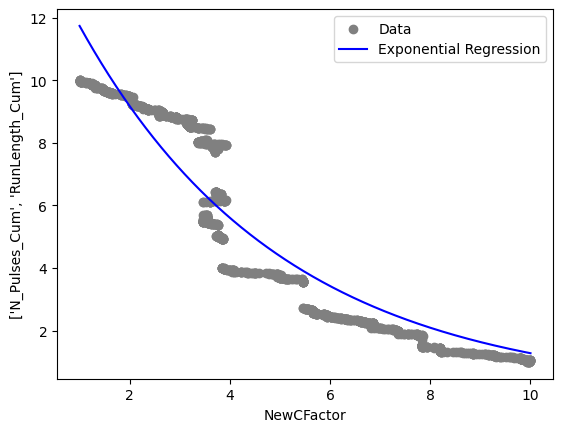

Fitted a: 15.017352540087257
Fitted b: -0.2463692593964401


In [43]:
def scale(df , target_name):
    scaler_X = MinMaxScaler(feature_range=(1, 10))
    scaler_y = MinMaxScaler(feature_range=(1, 10))
    x_scaled = scaler_X.fit_transform(df.NewCFactor.values.reshape(-1, 1))
    y_scaled = scaler_y.fit_transform(df[target_name].values.reshape(-1, 1))
    return x_scaled , y_scaled , scaler_X



target_name = ['N_Pulses_Cum' , 'RunLength_Cum']
plot_pred(*fit(*scale(df_large , target_name[1])[:2]) , target_name)

In [40]:

def do_all():
    models = {}
    target_names = ['N_Pulses_Cum' , 'RunLength_Cum']
    dfs = [df_large , df_small]
    for idx , df in enumerate(dfs):
        for target_name in target_names:
            if idx ==0:
                df_name = "large"
            else:
                df_name = "small"
            params = fit(*scale(df , target_name)) 
            models[df_name + "_" + str(target_name) ] = params
            plot_pred(*params , target_name)


    return models

# models = do_all()

In [39]:
models

{'large_N_Pulses_Cum': (array([9.92074674, 9.92074674, 9.94293765, ..., 1.        , 1.        ,
         1.        ]),
  array([ 1.        ,  1.00414669,  1.00571571, ...,  9.99036175,
          9.99652575, 10.        ]),
  array([ 1.        ,  1.00548112,  1.01096224, ...,  9.98903776,
          9.99451888, 10.        ]),
  array([10.94609491, 10.93240113, 10.91872449, ...,  1.40498572,
          1.40322806,  1.40147259]),
  13.7545148349445,
  -0.22838435872007745),
 'large_RunLength_Cum': (array([9.92074674, 9.92074674, 9.94293765, ..., 1.        , 1.        ,
         1.        ]),
  array([ 1.        ,  1.00217731,  1.00319176, ...,  9.99494292,
          9.99803453, 10.        ]),
  array([ 1.        ,  1.00548112,  1.01096224, ...,  9.98903776,
          9.99451888, 10.        ]),
  array([11.73806652, 11.72222637, 11.7064076 , ...,  1.28173488,
          1.28000522,  1.27827789]),
  15.017352540087257,
  -0.2463692593964401),
 'small_N_Pulses_Cum': (array([9.86892363, 9.8689236

In [44]:
value_to_predict = 0.5 
scaled_value = 

predict(scaled_value , models["large_N_Pulses_Cum"][-2] , models["large_N_Pulses_Cum"][-1])

5.516974912485452